In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
filepath = "data/Concrete.csv"
concrete_strength = pd.read_csv(filepath)
concrete_strength.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [3]:
from sklearn.linear_model import LinearRegression
concrete_strength.columns

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

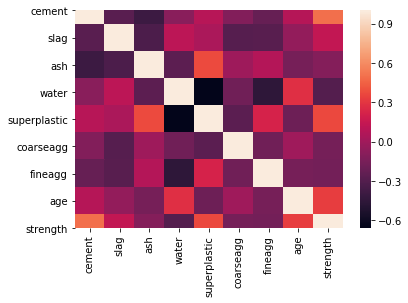

In [4]:
sns.heatmap(concrete_strength.corr())

In [5]:
X = concrete_strength[['cement', 'slag', 'ash', 'water', 'coarseagg',
       'fineagg', 'age']]
y = concrete_strength['strength']
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
polyFeat = PolynomialFeatures(degree=2)
X_poly = polyFeat.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=42)

https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [6]:
pol_reg = LinearRegression()
pol_reg.fit(X_train, y_train)
predictions = pol_reg.predict(X_test)
print(pol_reg.intercept_)
coeff_df = pd.DataFrame(pol_reg.coef_)
coeff_df

-14.389210835313477


,0
0,1.462067e-12
1,-4.805181e-01
2,-5.897051e-01
3,-2.329238e+00
4,1.924043e+00
5,1.414007e-01
6,-1.888833e-01
7,9.027605e-01
8,1.221737e-04
9,4.396426e-04


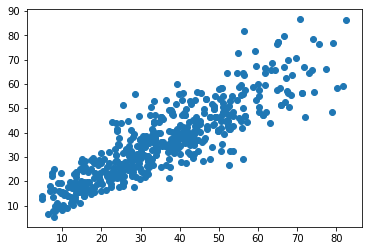

In [7]:
plt.scatter(y_test,predictions)

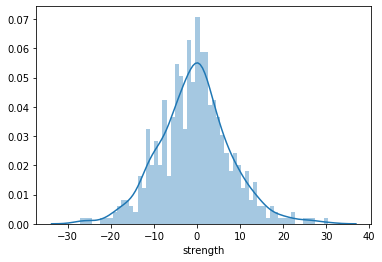

In [8]:
sns.distplot((y_test-predictions), bins=60)

In [9]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 6.339797124497407
MSE: 69.6917934241717
RMSE: 8.348161080391998


In [10]:
pd.DataFrame(pol_reg.coef_)

,0
0,1.462067e-12
1,-4.805181e-01
2,-5.897051e-01
3,-2.329238e+00
4,1.924043e+00
5,1.414007e-01
6,-1.888833e-01
7,9.027605e-01
8,1.221737e-04
9,4.396426e-04


In [44]:
from sklearn.datasets import make_regression
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=8, noise=0.1)
# fit final model
pol_reg.fit(X, y)
# define one new data instance
Xnew = [[250.0, 0.0, 95.7, 187.4, 5.5, 956.9, 861.2, 28]]
# make a prediction
ynew = pol_reg.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew[0], ynew[0]))

X=[250.0, 0.0, 95.7, 187.4, 5.5, 956.9, 861.2, 28], Predicted=121108.95641351982


In [64]:
# generate regression dataset
X, y = make_regression(n_samples=100, n_features=8, noise=0.1)
# fit final model
pol_reg.fit(X, y)
# new instances where we do not know the answer
Xnew, _ = make_regression(n_samples=3, n_features=8, noise=0.1, random_state=1)
# make a prediction
ynew = pol_reg.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[ 0.86540763 -0.61175641 -0.7612069  -0.52817175 -2.3015387   1.62434536
  1.74481176 -1.07296862], Predicted=126.54197286501258
X=[-1.10061918 -0.87785842  0.50249434  0.04221375  1.14472371 -0.17242821
  0.90159072  0.58281521], Predicted=59.30675694231964
X=[-0.3224172  -0.24937038 -1.09989127  1.46210794 -0.38405435  0.3190391
  1.13376944 -2.06014071], Predicted=-89.1164092990139


In [66]:
from sklearn import model_selection
import pickle
filename = 'Concrete_model.sav'
pickle.dump(pol_reg, open(filename, 'wb'))